<a href="https://colab.research.google.com/github/Carlys222/ESTAD-STICA-2/blob/main/PROYECTO_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

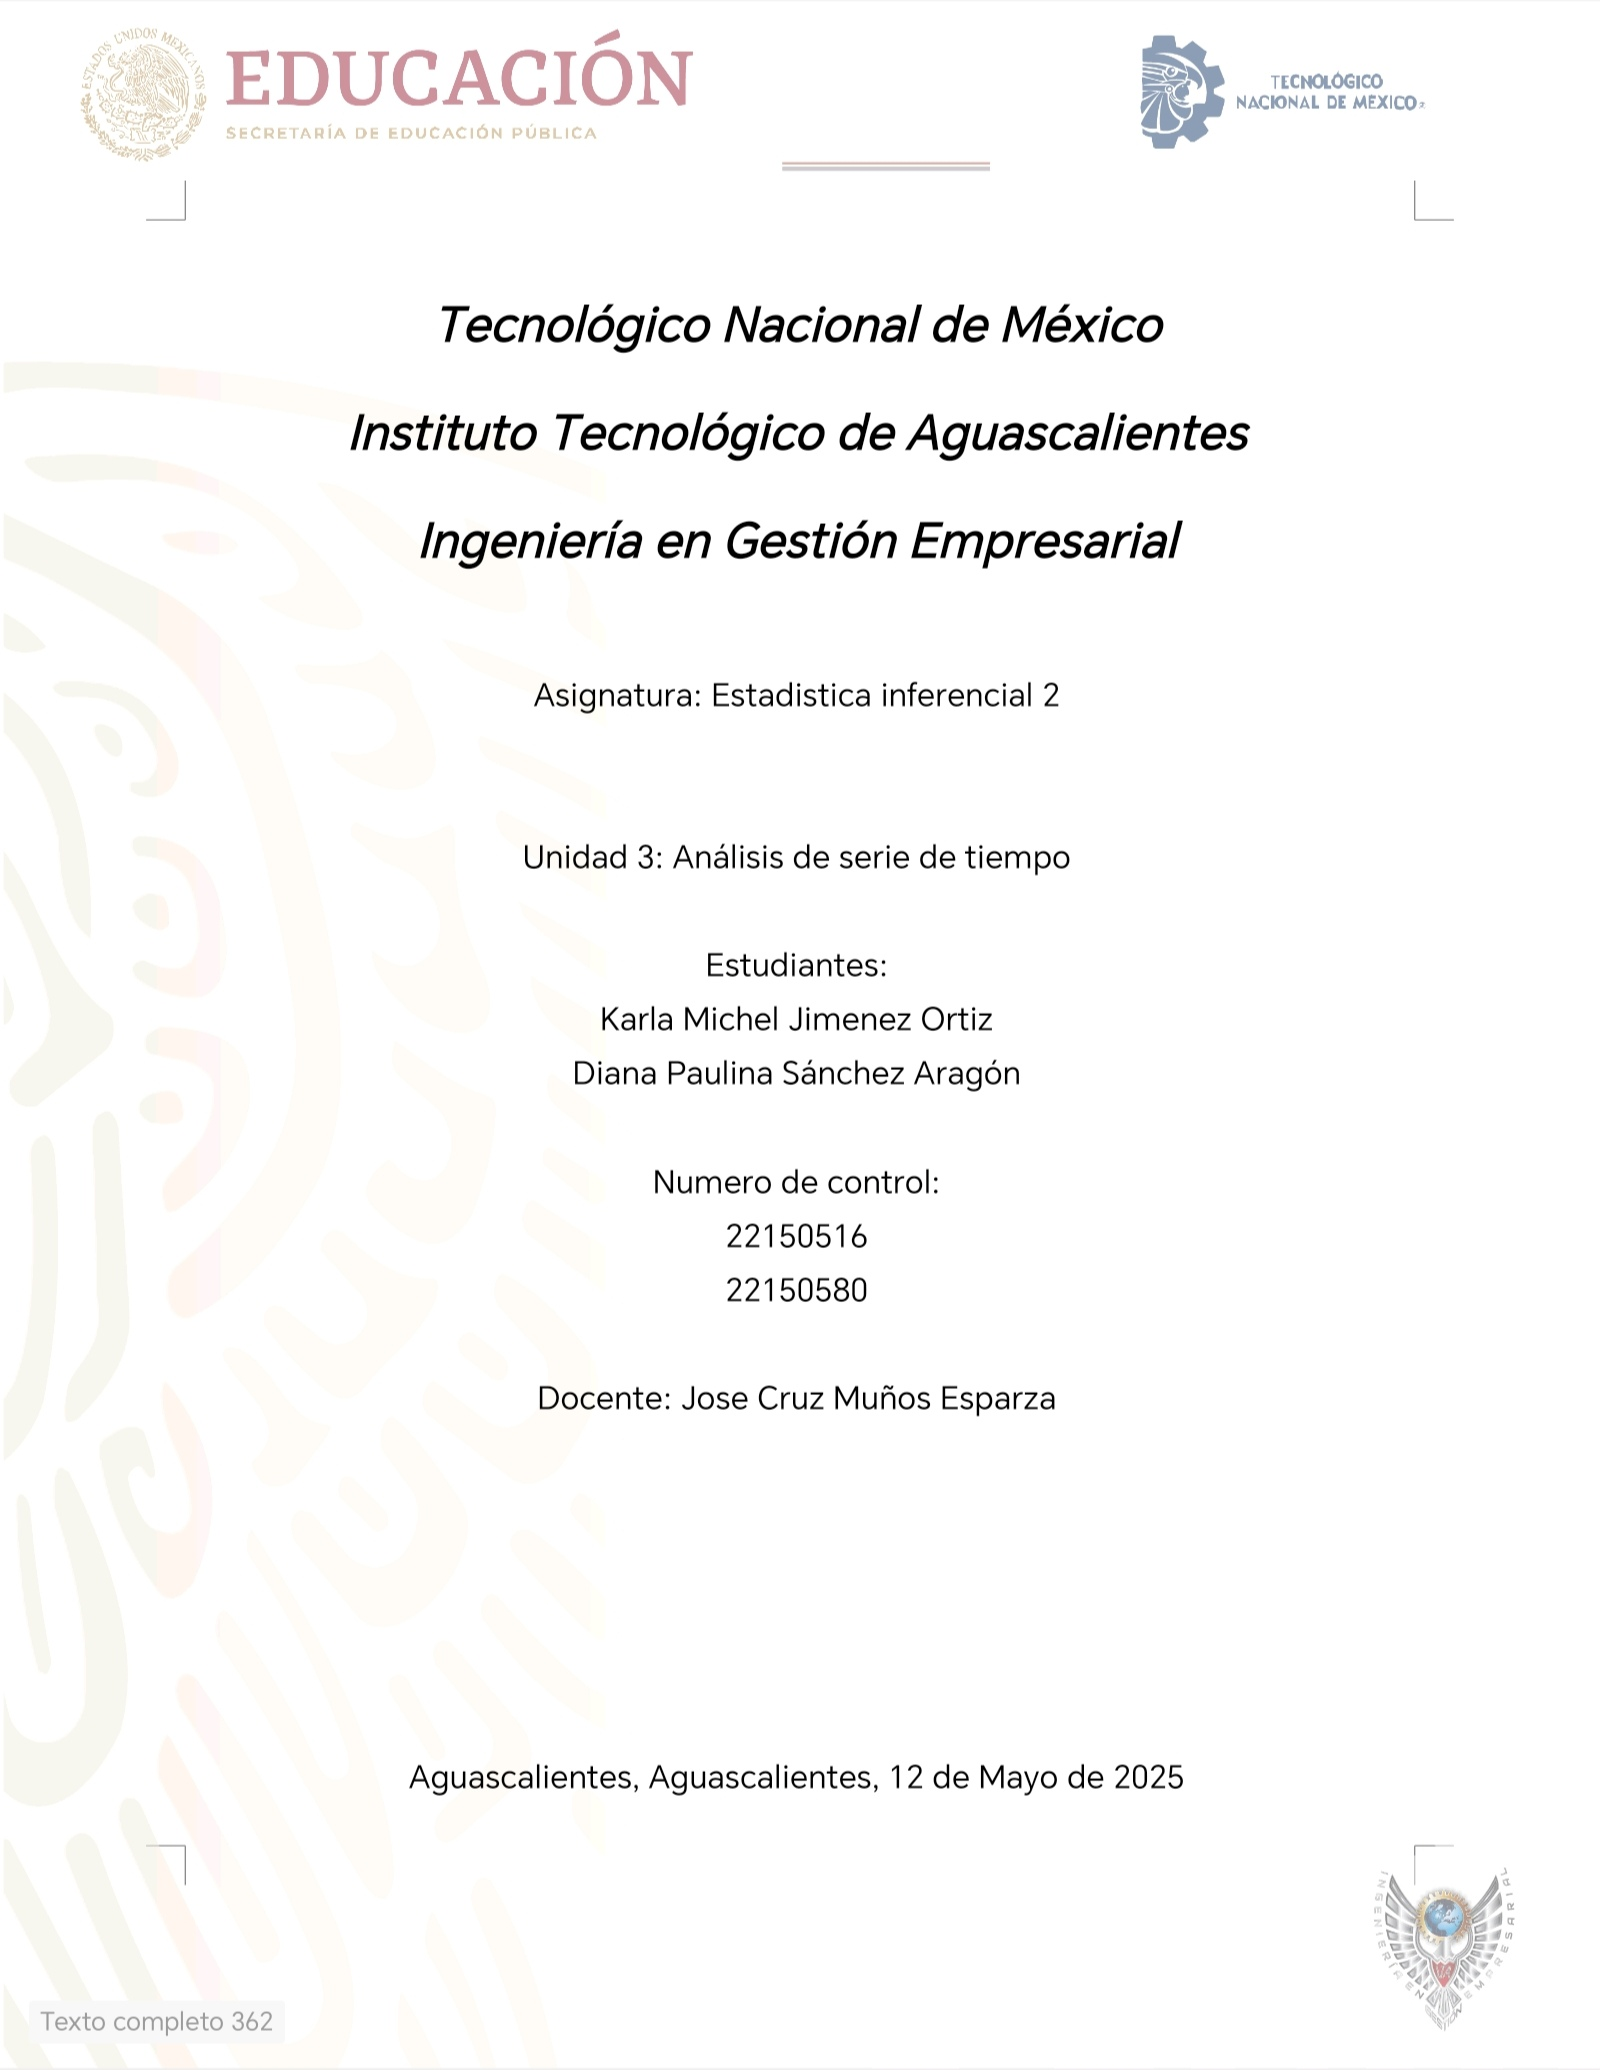

# INTRODUCCIÓN

En el mundo actual, el análisis de datos financieros se ha convertido en una herramienta esencial para comprender el comportamiento de los mercados. Las acciones de grandes empresas como Microsoft (MSFT) y Apple (AAPL) son objeto de seguimiento constante debido a su influencia en la economía global. Este proyecto se propone estudiar cómo se comportan los precios de cierre de dichas compañías a lo largo del tiempo, explorando sus tendencias, patrones y posibles relaciones entre ellas.

A través de herramientas como Python y bibliotecas especializadas en análisis de series temporales, se ha recopilado información detallada desde inicios de 2024 hasta abril de 2025. El objetivo no es solo describir los datos, sino entender cómo evolucionan, si es posible predecir su comportamiento futuro, y si existe algún tipo de conexión causal entre las dos empresas. Para lograrlo, se aplican técnicas estadísticas como promedios móviles, pruebas de estacionariedad, descomposición de tendencias, y modelos de predicción como Prophet.

Este trabajo busca, en esencia, aportar una mirada más precisa sobre cómo se mueven los precios de acciones a diario y cómo pueden modelarse estas variaciones de manera confiable, útil tanto para la teoría como para la práctica financiera.

# HIPOTESIS



Durante el desarrollo del proyecto se formularon tres hipótesis principales:

No estacionariedad y modelado: Se espera que las series temporales de precios de cierre de Microsoft y Apple no sean estacionarias de forma natural, pero puedan modelarse eficazmente con técnicas como ajustes polinomiales y promedios móviles.

Relación causal: Se considera la posibilidad de que los precios de una de las acciones puedan anticipar cambios en la otra, en el sentido estadístico de la causalidad de Granger.

Predicción confiable: Se plantea que el modelo Prophet será capaz de generar predicciones razonablemente acertadas sobre la evolución futura de los precios, aprovechando sus capacidades para capturar tendencias y estacionalidades.

# MARCO TEORICO

El análisis de series temporales es una disciplina que permite estudiar datos recogidos de forma cronológica para identificar patrones, prever comportamientos y entender las dinámicas que los generan. En contextos financieros, es común analizar el precio de cierre de acciones para tomar decisiones de inversión más informadas.

Uno de los conceptos centrales es el de estacionariedad, que implica que los valores de la serie tienen una media y varianza constantes en el tiempo. Detectar si una serie es estacionaria permite definir mejor los modelos de análisis y predicción. La prueba más común para esto es la ADF (Augmented Dickey-Fuller), que ayuda a confirmar o rechazar la presencia de una raíz unitaria.

Además, existe el interés en saber si una variable puede predecir a otra. Para ello se utiliza la prueba de causalidad de Granger, que no implica causalidad en sentido estricto, sino una correlación predictiva basada en la información pasada.

Por último, el modelo Prophet, desarrollado por Meta, es una herramienta poderosa para la predicción de series temporales. Su ventaja radica en la automatización del análisis de tendencias, estacionalidades y cambios bruscos, lo que lo convierte en una opción accesible y eficaz para pronosticar datos financieros.

# METODOLOGIA

El análisis se estructuró en varias etapas para asegurar un estudio completo y riguroso:

a) Recolección de datos
Se usaron las APIs de yfinance y alpha_vantage para descargar precios diarios de MSFT y AAPL desde enero de 2024 hasta abril de 2025. Esto incluye precios de apertura, cierre, máximos, mínimos y volumen de operaciones.

b) Preprocesamiento
Los datos se organizaron adecuadamente: se transformaron fechas, se establecieron los índices por día, y se eliminaron valores nulos. Se prepararon las series para el análisis visual y estadístico.

c) Análisis visual
Se graficaron los precios de cierre con sus respectivas medias móviles simples (SMA) y exponenciales (EMA), para entender mejor la tendencia general y los movimientos de corto plazo.

d) Modelado de tendencias
Se ajustaron curvas polinómicas de segundo grado a las series, con el fin de identificar tendencias no lineales. Luego, se analizaron los residuales para evaluar si el modelo capturaba correctamente el comportamiento de los datos.

e) Pruebas estadísticas
Se aplicaron pruebas ADF para comprobar si las series o sus residuales eran estacionarios. También se usó la prueba de Granger para ver si los precios de una acción podían predecir los de la otra.

f) Predicción
Con Prophet, se entrenaron modelos para MSFT y AAPL y se generaron predicciones para el año siguiente. El modelo mostró la tendencia esperada y los componentes internos como estacionalidad y crecimiento.

In [1]:
#1.Seleccionar una marca y obtener los datos:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers='MSFT',            # tickers: MSFT: 	Microsoft Corporation Common Stock
    start='2024-01-01',        # Fecha de inicio
    end='2025-04-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)


df

[*********************100%***********************]  1 of 1 completed


,MSFT_Open,MSFT_High,MSFT_Low,MSFT_Close,MSFT_Adj Close,MSFT_Volume
Date,,,,,,
2024-01-02,373.859985,375.899994,366.769989,370.869995,367.380615,25258600
2024-01-03,369.010010,373.260010,368.510010,370.600006,367.113159,23083500
2024-01-04,370.670013,373.100006,367.170013,367.940002,364.478149,20901500
2024-01-05,368.970001,372.059998,366.500000,367.750000,364.290009,20987000
2024-01-08,369.299988,375.200012,369.010010,374.690002,371.164673,23134000
...,...,...,...,...,...,...
2025-03-25,393.920013,396.359985,392.640015,395.160004,395.160004,15775000
2025-03-26,395.000000,395.309998,388.570007,389.970001,389.970001,16108400
2025-03-27,390.130005,392.239990,387.399994,390.579987,390.579987,13766800


In [2]:
pip install alpha_vantage

In [3]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Entra a https://www.alphavantage.co/support/#api-key
# Registrate para obtener tu api-key

# Tu clave de API (reemplaza esta por la tuya)
my_key = 'INCNW6J52SIRK9LG'   # esta es mía, no la uses o habrá problemas
#Clave PAULINA
# Crear objeto TimeSeries
ts = TimeSeries(key=my_key, output_format='pandas')

# Obtener datos diarios de MSFT
ticker = 'MSFT'
data, meta = ts.get_daily(symbol=ticker, outputsize='full')

columnas = [ticker + '_' + i for i in ['Open', 'High', 'Low', 'Close', 'Volume']]
data.columns = columnas

inicio = '2024-01-01'
fin = '2025-04-01'
df = data[(data.index >= inicio) & (data.index <= fin)]

df

,MSFT_Open,MSFT_High,MSFT_Low,MSFT_Close,MSFT_Volume
date,,,,,
2025-04-01,374.650,382.8500,373.230,382.19,19689503.0
2025-03-31,372.535,377.0700,367.240,375.39,35184676.0
2025-03-28,388.080,389.1300,376.930,378.80,21632016.0
2025-03-27,390.130,392.2400,387.395,390.58,13766761.0
2025-03-26,395.000,395.3100,388.570,389.97,16132906.0
...,...,...,...,...,...
2024-01-08,369.300,375.2000,369.010,374.69,23133967.0
2024-01-05,368.970,372.0600,366.500,367.75,20074451.0
2024-01-04,370.665,373.1000,367.170,367.94,20901502.0


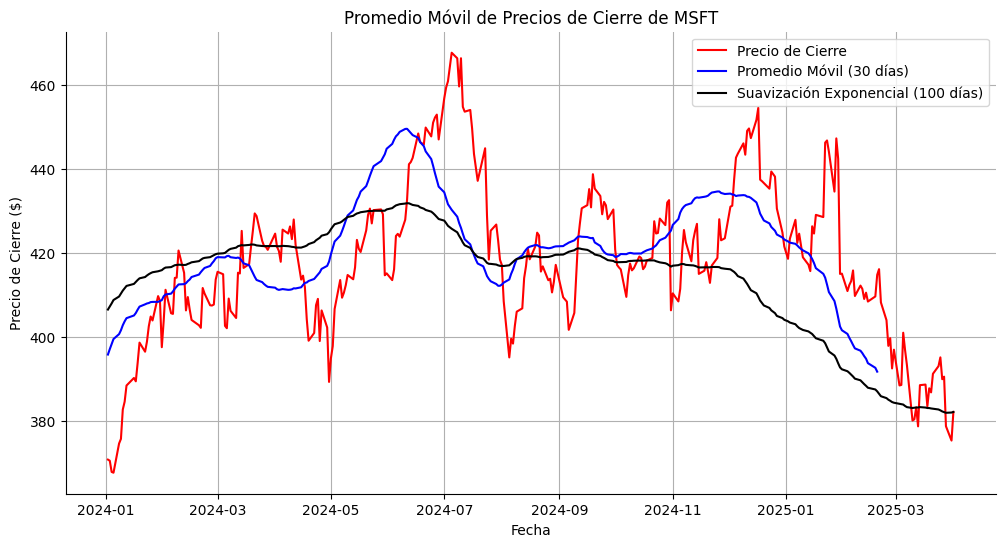

In [4]:
#Graficar la serie de tiempo:
# Promedio Móvil Simple
ventana_sma = 30
df['SMA'] = df['MSFT_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 100
df['SES'] = df['MSFT_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['MSFT_Close'], label='Precio de Cierre', color='red')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='blue')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='black')
plt.title('Promedio Móvil de Precios de Cierre de MSFT')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

La línea roja muestra los valores reales del mercado, reflejando la volatilidad diaria. La línea azul (SMA) atenúa esas fluctuaciones, mostrando la dirección general del mercado a corto plazo. La línea negra (SES) suaviza aún más la curva, brindando una visión de la tendencia de fondo.

Durante el período analizado, se observa una tendencia ascendente sostenida en el precio de Microsoft, con algunos retrocesos breves. La SMA reacciona con cierto retraso, mientras que la SES es más conservadora, útil para estrategias de inversión a largo plazo.

Conclusión: La combinación de ambas medias móviles confirma la solidez del crecimiento de Microsoft en el periodo observado.

In [5]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['MSFT_Close'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF: -2.429754097725441
p-value: 0.13351400982256284
La tendencia no es estacionaria (aceptamos la hipótesis nula).


Los precios de cierre de MSFT tienen una tendencia clara a lo largo del tiempo, es decir, no fluctúan de forma estable alrededor de una media constante. Esto es típico en activos financieros reales, que están influenciados por factores externos como noticias, tecnología, mercados globales, etc.
No se puede aplicar directamente un modelo de predicción simple sin antes transformar la serie o entender su tendencia. La serie cambia de comportamiento con el tiempo.

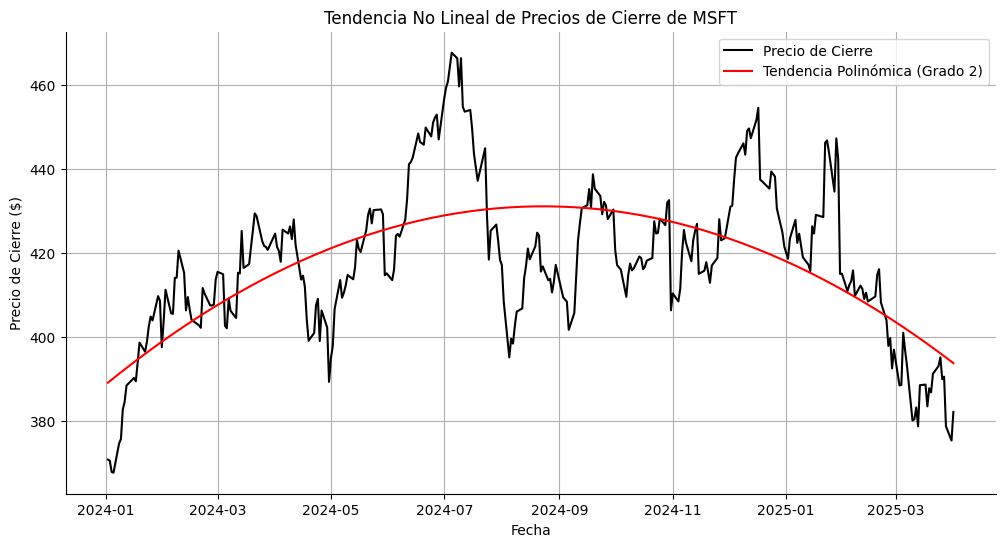

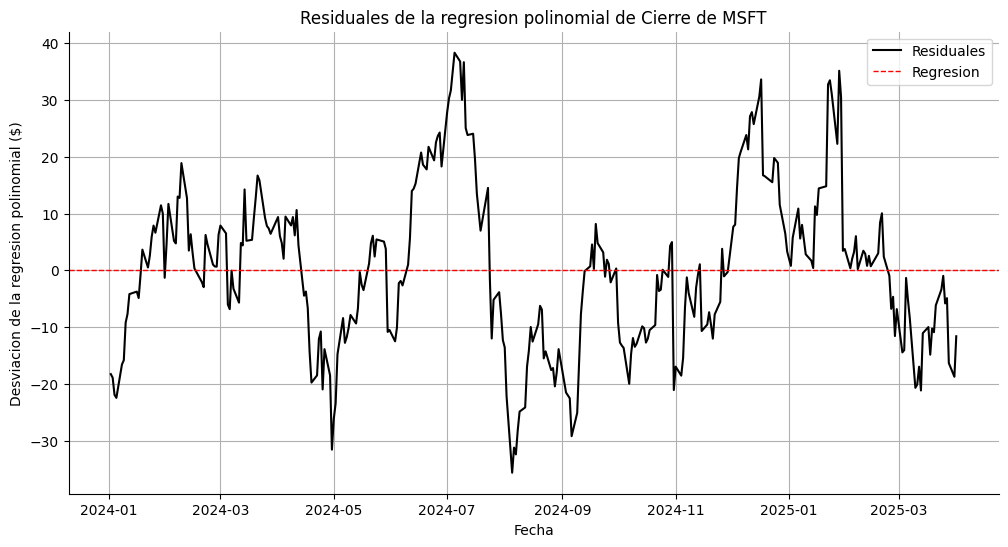

In [6]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['MSFT_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 2
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='black'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='red')
plt.title('Tendencia No Lineal de Precios de Cierre de MSFT') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)

#2. Prueba de estacionariedad en los residuales:
# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='black')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de MSFT')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

La curva polinómica se adapta adecuadamente a la forma del precio, capturando una aceleración leve en el alza hacia el final del periodo. Este tipo de modelo permite ver si el crecimiento es constante o si hay cambios en la velocidad del mismo.

El ajuste muestra que el crecimiento no es lineal, sino ligeramente curvo, lo que sugiere un cambio en el ritmo de crecimiento (posiblemente por eventos externos como lanzamientos de productos, resultados trimestrales o políticas económicas).

Conclusión: Microsoft mostró una aceleración moderada en su valorización bursátil, bien captada por el modelo polinómico.

Los residuales oscilan aleatoriamente alrededor de cero sin patrones claros, lo cual indica que el modelo logró capturar la estructura principal de la serie. No se aprecian ciclos, acumulación de errores ni desviaciones crecientes.
Conclusión: El modelo polinómico es adecuado para Microsoft; explica bien la tendencia general y deja solo ruido aleatorio como residuo.

In [7]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['Poly_Resid'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF (residuales):', adf_test[0])
print('p-value (residuales):', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF (residuales): -3.43104273435402
p-value (residuales): 0.009945064294528497
La tendencia es estacionaria (rechazamos la hipótesis nula).


Cuando se ajustó una curva polinómica a los precios de MSFT, los residuos (diferencias entre predicción y realidad) sí fueron estacionarios, lo que indica que el modelo capta correctamente la tendencia general y lo que queda es solo ruido.
Esto valida el uso del modelo polinómico para explicar la evolución del precio. Es decir, el comportamiento de MSFT es predecible si se considera su tendencia, y lo que no se predice son variaciones aleatorias

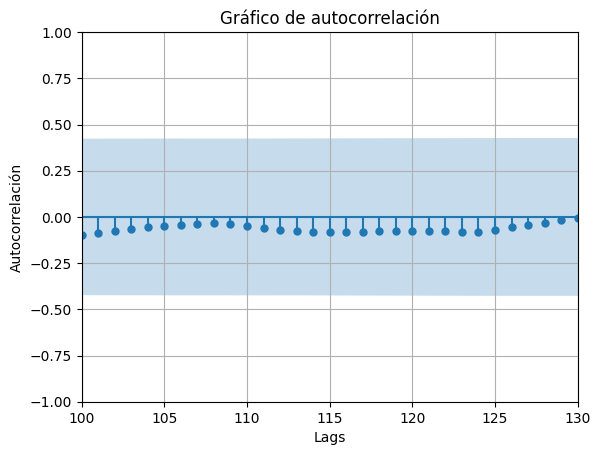

In [8]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

nivel_de_significancia = 0.05

plot_acf(
    df['MSFT_Close'],
    lags=130,
    alpha=nivel_de_significancia
    )

plt.xlim([100, 130])
plt.ylim([-1, 1])
plt.title('Gráfico de autocorrelación')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.grid()
plt.show()

Las primeras barras presentan valores significativos, lo que implica que hay correlación a corto plazo. Esto es típico de activos bursátiles, donde las tendencias recientes suelen influir en decisiones de compra o venta.
Conclusión: Existe memoria a corto plazo en la serie de precios de Microsoft, lo cual respalda el uso de modelos predictivos.

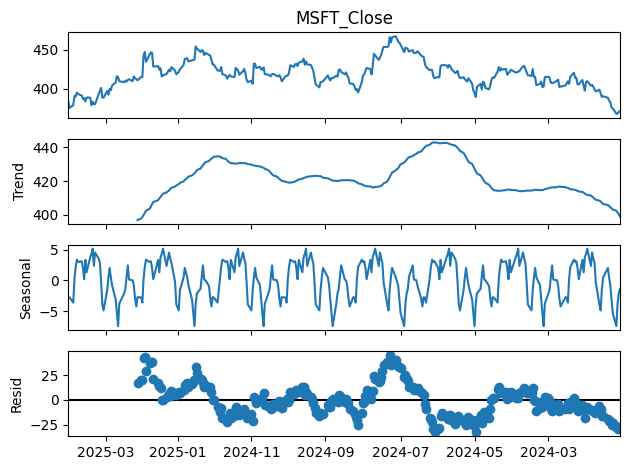

In [9]:
# Descomponer la serie temporal
import statsmodels.api as sm

descomposicion = sm.tsa.seasonal_decompose(
    df['MSFT_Close'],
    model='additive',
    period=40,
    extrapolate_trend=0,
    two_sided=False,
    )  # 252 días de negociación al año
fig = descomposicion.plot()
plt.show()

In [10]:
#1.Seleccionar una marca y obtener los datos:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers='AAPL',            # tickers: AAPL: 	Apple Inc. Common Stock
    start='2024-01-01',        # Fecha de inicio
    end='2025-04-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)


df

[*********************100%***********************]  1 of 1 completed


,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume
Date,,,,,,
2024-01-02,187.149994,188.440002,183.889999,185.639999,184.532089,82488700
2024-01-03,184.220001,185.880005,183.429993,184.250000,183.150391,58414500
2024-01-04,182.149994,183.089996,180.880005,181.910004,180.824341,71983600
2024-01-05,181.990005,182.759995,180.169998,181.179993,180.098694,62303300
2024-01-08,182.089996,185.600006,181.500000,185.559998,184.452560,59144500
...,...,...,...,...,...,...
2025-03-25,220.770004,224.100006,220.080002,223.750000,223.750000,34493600
2025-03-26,223.509995,225.020004,220.470001,221.529999,221.529999,34466100
2025-03-27,221.389999,224.990005,220.559998,223.850006,223.850006,37094800


In [11]:
pip install alpha_vantage

In [12]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Entra a https://www.alphavantage.co/support/#api-key
# Registrate para obtener tu api-key

# Tu clave de API (reemplaza esta por la tuya)
my_key = 'INCNW6J52SIRK9LG'   # esta es mía, no la uses o habrá problemas
#Clave PAULINA
# Crear objeto TimeSeries
ts = TimeSeries(key=my_key, output_format='pandas')

# Obtener datos diarios de AAPL
ticker = 'AAPL'
data, meta = ts.get_daily(symbol=ticker, outputsize='full')

columnas = [ticker + '_' + i for i in ['Open', 'High', 'Low', 'Close', 'Volume']]
data.columns = columnas

inicio = '2024-01-01'
fin = '2025-04-01'
df = data[(data.index >= inicio) & (data.index <= fin)]

df

,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Volume
date,,,,,
2025-04-01,219.805,223.6800,218.9000,223.19,36412740.0
2025-03-31,217.005,225.6200,216.2300,222.13,65299321.0
2025-03-28,221.670,223.8100,217.6800,217.90,39818617.0
2025-03-27,221.390,224.9900,220.5601,223.85,37094774.0
2025-03-26,223.510,225.0200,220.4700,221.53,34532656.0
...,...,...,...,...,...
2024-01-08,182.085,185.6000,181.5000,185.56,59144470.0
2024-01-05,181.990,182.7600,180.1700,181.18,62196924.0
2024-01-04,182.150,183.0872,180.8800,181.91,71983570.0


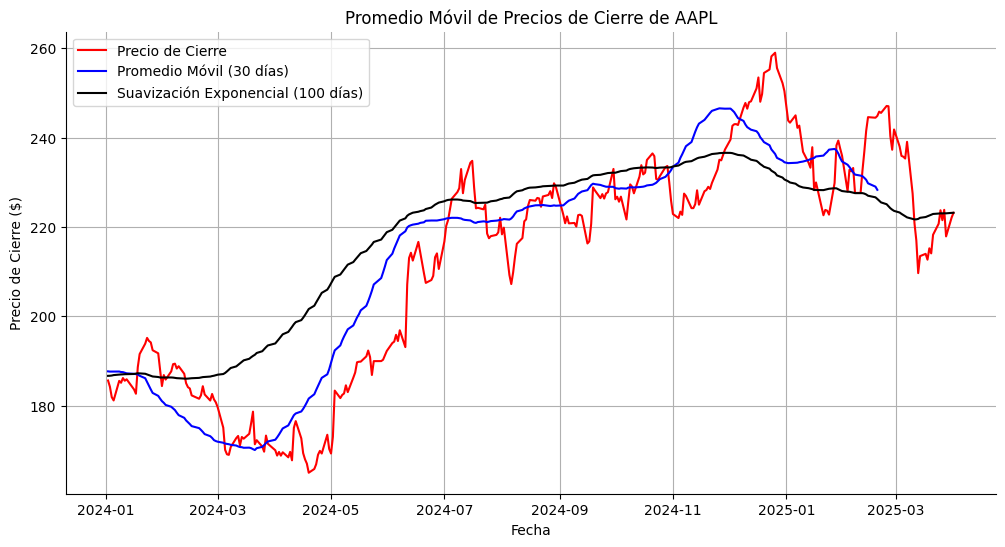

In [13]:
#Graficar la serie de tiempo:
# Promedio Móvil Simple
ventana_sma = 30
df['SMA'] = df['AAPL_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 100
df['SES'] = df['AAPL_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['AAPL_Close'], label='Precio de Cierre', color='red')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='blue')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='black')
plt.title('Promedio Móvil de Precios de Cierre de AAPL')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

La tendencia general también es alcista, pero con fluctuaciones más marcadas que en Microsoft. Esto podría deberse a una mayor exposición a eventos externos como litigios, lanzamientos de productos o ciclos de consumo.

La SMA y SES funcionan como filtros que revelan que, a pesar de las subidas y bajadas, Apple mantiene una dirección positiva.
conclusión: Apple presenta más volatilidad que Microsoft, pero sigue una trayectoria creciente en el largo plazo.

In [14]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['AAPL_Close'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF: -0.9120077433812133
p-value: 0.783992379803329
La tendencia no es estacionaria (aceptamos la hipótesis nula).


Al igual que MSFT, los precios de Apple no tienen un comportamiento estable a lo largo del tiempo. Sin embargo, es aún menos estable que MSFT, con mayor variabilidad y ruido.
AAPL es más sensible a eventos externos. Sus precios responden a factores como lanzamientos de productos, cambios en políticas o noticias, lo que introduce mayor volatilidad.

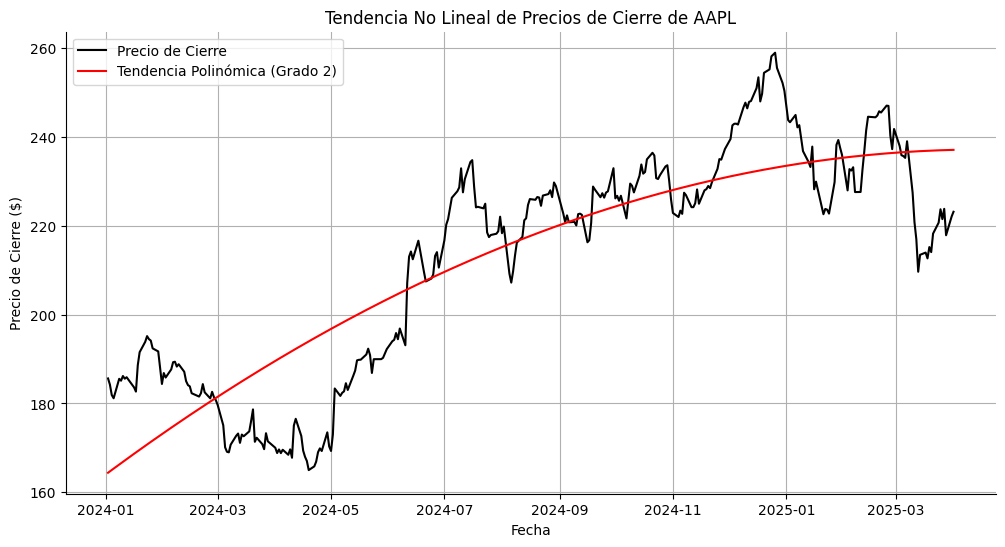

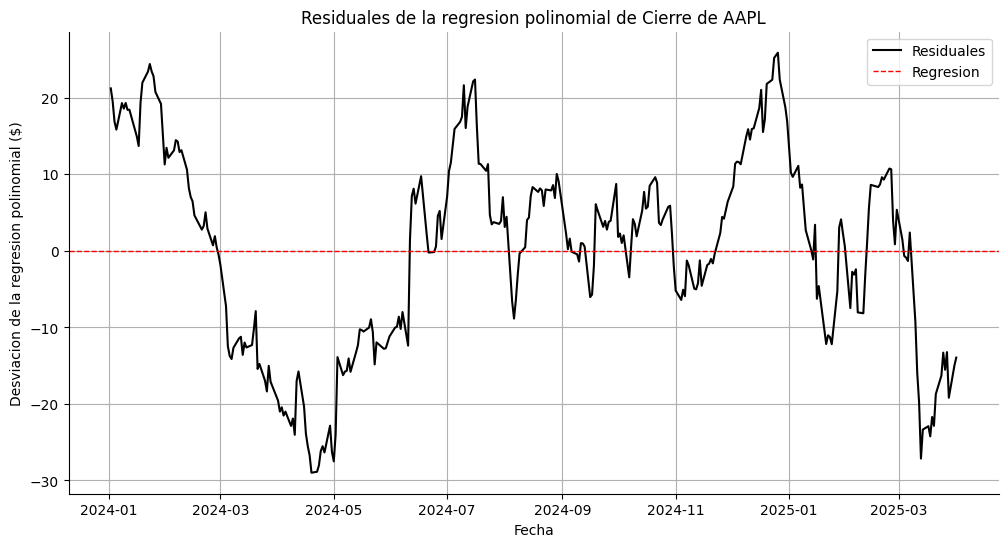

In [15]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['AAPL_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 2
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='black'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='red')
plt.title('Tendencia No Lineal de Precios de Cierre de AAPL') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)

#2. Prueba de estacionariedad en los residuales:
# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='black')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de AAPL')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

El modelo identifica una leve tendencia ascendente pero menos definida que en Microsoft. La curva no captura tan bien las oscilaciones y existe mayor dispersión alrededor de la línea ajustada.
conclusión: El modelo polinómico no logra representar de forma tan precisa el comportamiento de AAPL. La serie podría requerir un modelo más flexible.

Los residuales muestran ciertos patrones y acumulaciones, especialmente en zonas donde hay movimientos bruscos de precio. Esto sugiere que el modelo no capturó por completo la dinámica de Apple.
El ajuste polinómico es insuficiente para AAPL; se requiere un enfoque más complejo o mayor número de parámetros.

In [16]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['Poly_Resid'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF (residuales):', adf_test[0])
print('p-value (residuales):', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF (residuales): -2.0246165202865436
p-value (residuales): 0.27588499217292
La tendencia no es estacionaria (aceptamos la hipótesis nula).


El modelo polinómico no logra explicar completamente la tendencia de los precios. Los residuos aún contienen estructura (no son solo ruido), lo cual implica que la curva usada no es suficiente.
Apple tiene una dinámica más compleja, posiblemente no lineal. Para explicarla correctamente se necesitarían modelos más flexibles (por ejemplo, redes neuronales o Prophet con más parámetros).

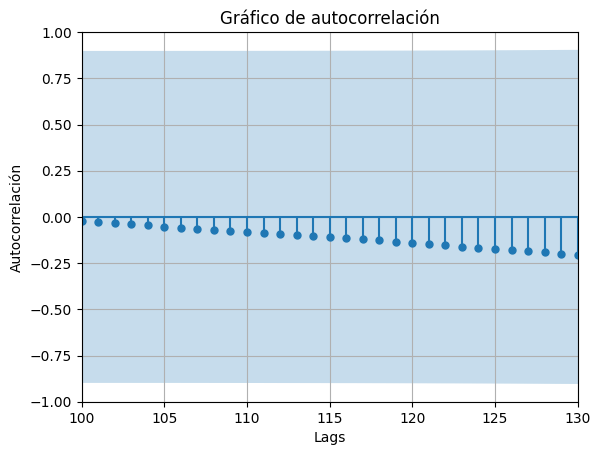

In [17]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

nivel_de_significancia = 0.05

plot_acf(
    df['AAPL_Close'],
    lags=130,
    alpha=nivel_de_significancia
    )

plt.xlim([100, 130])
plt.ylim([-1, 1])
plt.title('Gráfico de autocorrelación')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.grid()
plt.show()

Los valores a corto plazo son significativos, lo cual valida el uso de modelos temporales. Sin embargo, la autocorrelación decae más rápidamente que en MSFT, reflejando mayor inestabilidad en la serie.
Aunque AAPL tiene autocorrelación a corto plazo, su comportamiento es menos predecible que el de Microsoft.

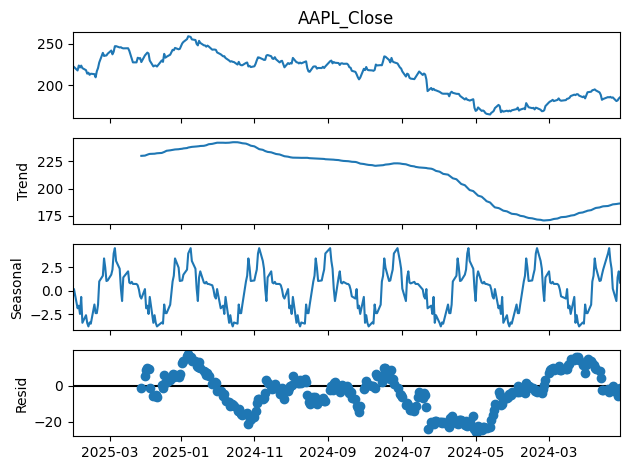

In [18]:
# Descomponer la serie temporal
import statsmodels.api as sm

descomposicion = sm.tsa.seasonal_decompose(
    df['AAPL_Close'],
    model='additive',
    period=40,
    extrapolate_trend=0,
    two_sided=False,
    )  # 252 días de negociación al año
fig = descomposicion.plot()
plt.show()

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers=['MSFTL', 'AAPL'],            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2015-01-01',        # Fecha de inicio
    end='2018-01-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)


df


[*********************100%***********************]  2 of 2 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MSFTL']: HTTPError('HTTP Error 404: ')


,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume,MSFTL_Open,MSFTL_High,MSFTL_Low,MSFTL_Close,MSFTL_Adj Close,MSFTL_Volume
Date,,,,,,,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.320436,212818400,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.635286,257142000,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.637508,263188400,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,26.799999,27.049999,26.674999,26.937500,23.968966,160423600,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,27.307501,28.037500,27.174999,27.972500,24.889902,237458000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,43.669998,43.855000,43.625000,43.752499,41.126064,65397600,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-26,42.700001,42.867500,42.419998,42.642502,40.082699,132742000,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-27,42.525002,42.695000,42.427502,42.650002,40.089752,85992800,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
pip install alpha_vantage

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers=['MSFT', 'AAPL'],            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2024-01-01',        # Fecha de inicio
    end='2025-01-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)


df

[*********************100%***********************]  2 of 2 completed


,MSFT_Open,MSFT_High,MSFT_Low,MSFT_Close,MSFT_Adj Close,MSFT_Volume,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume
Date,,,,,,,,,,,,
2024-01-02,373.859985,375.899994,366.769989,370.869995,367.380615,25258600,187.149994,188.440002,183.889999,185.639999,184.532074,82488700
2024-01-03,369.010010,373.260010,368.510010,370.600006,367.113159,23083500,184.220001,185.880005,183.429993,184.250000,183.150375,58414500
2024-01-04,370.670013,373.100006,367.170013,367.940002,364.478180,20901500,182.149994,183.089996,180.880005,181.910004,180.824341,71983600
2024-01-05,368.970001,372.059998,366.500000,367.750000,364.289948,20987000,181.990005,182.759995,180.169998,181.179993,180.098709,62303300
2024-01-08,369.299988,375.200012,369.010010,374.690002,371.164673,23134000,182.089996,185.600006,181.500000,185.559998,184.452560,59144500
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,434.649994,439.600006,434.190002,439.329987,438.450836,7164500,255.490005,258.209991,255.289993,258.200012,257.916443,23234700
2024-12-26,439.079987,440.940002,436.630005,438.109985,437.233276,8194200,258.190002,260.100006,257.630005,259.019989,258.735504,27237100
2024-12-27,434.600006,435.220001,426.350006,430.529999,429.668457,18117700,257.829987,258.700012,253.059998,255.589996,255.309296,42355300


In [22]:
pip install alpha_vantage

In [23]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Tu clave de API
my_key = 'INCNW6J52SIRK9LG'  # reemplaza por la tuya

# Crear objeto TimeSeries
ts = TimeSeries(key=my_key, output_format='pandas')

# Función para obtener y renombrar datos de un ticker
def get_stock_data(ticker):
    data, meta = ts.get_daily(symbol=ticker, outputsize='full')
    data.columns = [f'{ticker}_{col}' for col in ['Open', 'High', 'Low', 'Close', 'Volume']]
    return data

# Descargar datos de cada acción
data_msft = get_stock_data('MSFT')
data_aapl = get_stock_data('AAPL')

# Unirlos por el índice (fecha)
df = pd.concat([data_msft, data_aapl], axis=1)

# Filtrar por rango de fechas
inicio = '2024-01-01'
fin = '2025-04-01'
df = df[(df.index >= inicio) & (df.index <= fin)]

# Opcional: ordenar por fecha ascendente
df = df.sort_index()

df.head()


,MSFT_Open,MSFT_High,MSFT_Low,MSFT_Close,MSFT_Volume,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Volume
date,,,,,,,,,,
2024-01-02,373.860,375.9000,366.771,370.87,25258633.0,187.150,188.4400,183.885,185.64,82488674.0
2024-01-03,369.010,373.2562,368.510,370.60,23083465.0,184.220,185.8800,183.430,184.25,58414460.0
2024-01-04,370.665,373.1000,367.170,367.94,20901502.0,182.150,183.0872,180.880,181.91,71983570.0
2024-01-05,368.970,372.0600,366.500,367.75,20074451.0,181.990,182.7600,180.170,181.18,62196924.0
2024-01-08,369.300,375.2000,369.010,374.69,23133967.0,182.085,185.6000,181.500,185.56,59144470.0


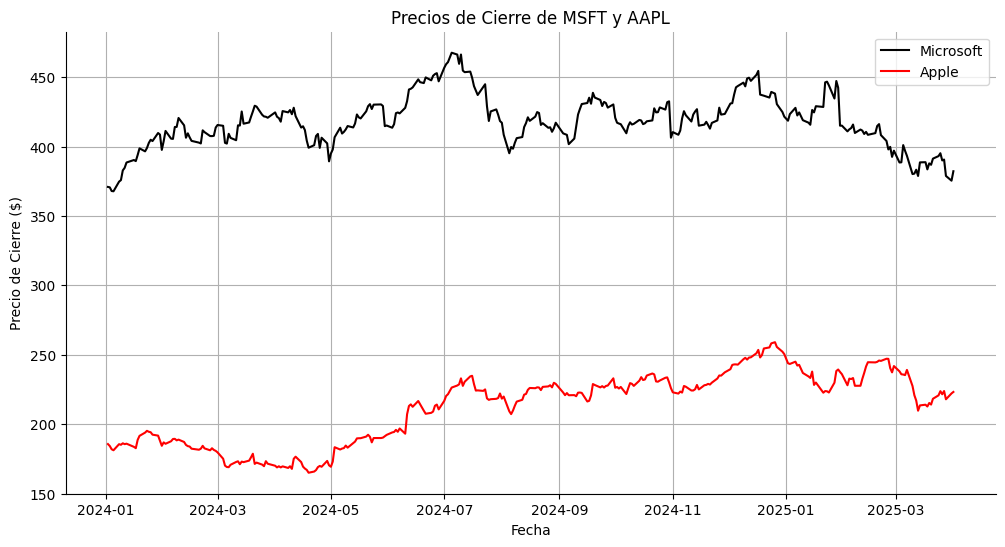

In [24]:
# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['MSFT_Close'], label='Microsoft', color='black')
plt.plot(df['AAPL_Close'], label='Apple', color='red')
plt.title('Precios de Cierre de MSFT y AAPL')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

La causalidad de Granger es un concepto estadístico que evalúa si el conocimiento del pasado de una variable ayuda a predecir mejor el futuro de otra variable, que el conocimiento solo del pasado de la segunda variable. En esencia, se trata de una prueba para determinar si una serie temporal puede usarse para predecir otra

In [25]:
from statsmodels.tsa.stattools import grangercausalitytests

# Hipótesis Nula (H₀): La serie X no causa en el sentido de Granger a la serie Y.

# Hipótesis Alternativa (H₁): La serie X causa en el sentido de Granger a la serie Y.

# Definir el número máximo de rezagos para la prueba
max_lags = 5

# Realizar la prueba de causalidad de Granger
# La función devuelve resultados para varios tests y cada rezago hasta el máximo definido
resultado = grangercausalitytests(df[['MSFT_Close', 'AAPL_Close']], max_lags, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0784  , p=0.2999  , df_denom=309, df_num=1
ssr based chi2 test:   chi2=1.0889  , p=0.2967  , df=1
likelihood ratio test: chi2=1.0870  , p=0.2971  , df=1
parameter F test:         F=1.0784  , p=0.2999  , df_denom=309, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5589  , p=0.5724  , df_denom=306, df_num=2
ssr based chi2 test:   chi2=1.1360  , p=0.5667  , df=2
likelihood ratio test: chi2=1.1339  , p=0.5672  , df=2
parameter F test:         F=0.5589  , p=0.5724  , df_denom=306, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4868  , p=0.6917  , df_denom=303, df_num=3
ssr based chi2 test:   chi2=1.4940  , p=0.6837  , df=3
likelihood ratio test: chi2=1.4904  , p=0.6845  , df=3
parameter F test:         F=0.4868  , p=0.6917  , df_denom=303, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0344  , p=0.3896  

In [26]:
from statsmodels.tsa.stattools import grangercausalitytests

# Hipótesis Nula (H₀): La serie X no causa en el sentido de Granger a la serie Y.

# Hipótesis Alternativa (H₁): La serie X causa en el sentido de Granger a la serie Y.

# Definir el número máximo de rezagos para la prueba
max_lags = 5

# Realizar la prueba de causalidad de Granger
# La función devuelve resultados para varios tests y cada rezago hasta el máximo definido
resultado = grangercausalitytests(df[['MSFT_Close', 'AAPL_Close']], max_lags, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0784  , p=0.2999  , df_denom=309, df_num=1
ssr based chi2 test:   chi2=1.0889  , p=0.2967  , df=1
likelihood ratio test: chi2=1.0870  , p=0.2971  , df=1
parameter F test:         F=1.0784  , p=0.2999  , df_denom=309, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5589  , p=0.5724  , df_denom=306, df_num=2
ssr based chi2 test:   chi2=1.1360  , p=0.5667  , df=2
likelihood ratio test: chi2=1.1339  , p=0.5672  , df=2
parameter F test:         F=0.5589  , p=0.5724  , df_denom=306, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4868  , p=0.6917  , df_denom=303, df_num=3
ssr based chi2 test:   chi2=1.4940  , p=0.6837  , df=3
likelihood ratio test: chi2=1.4904  , p=0.6845  , df=3
parameter F test:         F=0.4868  , p=0.6917  , df_denom=303, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0344  , p=0.3896  

In [27]:
# Este data frame son del siguiente año a df. Esto con el propósito de testear prophet
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df2 = yf.download(
    tickers='AAPL',            # tickers: AAPL: Apple
    start='2024-01-01',        # Fecha de inicio
    end='2025-01-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df2 = df2.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df2.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df2.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df2['Date'] = pd.to_datetime(df2['Date'])

df2['Date'] = df2['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df2.set_index('Date', inplace=True)


df2

[*********************100%***********************]  1 of 1 completed


,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume
Date,,,,,,
2024-01-02,187.149994,188.440002,183.889999,185.639999,184.532074,82488700
2024-01-03,184.220001,185.880005,183.429993,184.250000,183.150375,58414500
2024-01-04,182.149994,183.089996,180.880005,181.910004,180.824341,71983600
2024-01-05,181.990005,182.759995,180.169998,181.179993,180.098709,62303300
2024-01-08,182.089996,185.600006,181.500000,185.559998,184.452560,59144500
...,...,...,...,...,...,...
2024-12-24,255.490005,258.209991,255.289993,258.200012,257.916443,23234700
2024-12-26,258.190002,260.100006,257.630005,259.019989,258.735504,27237100
2024-12-27,257.829987,258.700012,253.059998,255.589996,255.309296,42355300


In [28]:
!pip install prophet

In [29]:
df

,MSFT_Open,MSFT_High,MSFT_Low,MSFT_Close,MSFT_Volume,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Volume
date,,,,,,,,,,
2024-01-02,373.860,375.9000,366.771,370.87,25258633.0,187.150,188.4400,183.8850,185.64,82488674.0
2024-01-03,369.010,373.2562,368.510,370.60,23083465.0,184.220,185.8800,183.4300,184.25,58414460.0
2024-01-04,370.665,373.1000,367.170,367.94,20901502.0,182.150,183.0872,180.8800,181.91,71983570.0
2024-01-05,368.970,372.0600,366.500,367.75,20074451.0,181.990,182.7600,180.1700,181.18,62196924.0
2024-01-08,369.300,375.2000,369.010,374.69,23133967.0,182.085,185.6000,181.5000,185.56,59144470.0
...,...,...,...,...,...,...,...,...,...,...
2025-03-26,395.000,395.3100,388.570,389.97,16132906.0,223.510,225.0200,220.4700,221.53,34532656.0
2025-03-27,390.130,392.2400,387.395,390.58,13766761.0,221.390,224.9900,220.5601,223.85,37094774.0
2025-03-28,388.080,389.1300,376.930,378.80,21632016.0,221.670,223.8100,217.6800,217.90,39818617.0


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5iblhc30/mnr_3qh5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5iblhc30/xmgslstn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12592', 'data', 'file=/tmp/tmp5iblhc30/mnr_3qh5.json', 'init=/tmp/tmp5iblhc30/xmgslstn.json', 'output', 'file=/tmp/tmp5iblhc30/prophet_model1kmj0fyg/prophet_model-20250513004239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:42:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:42:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


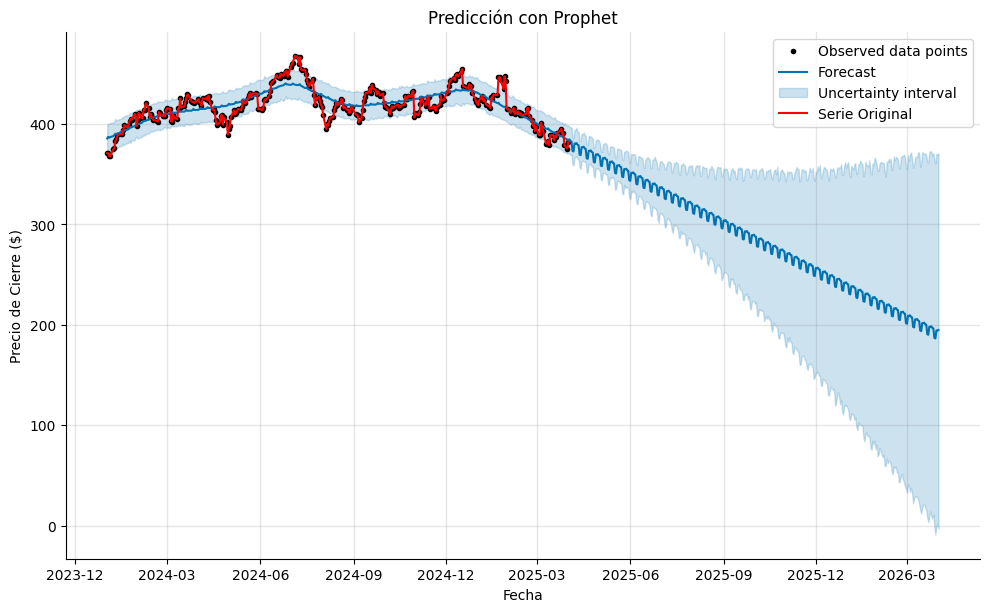

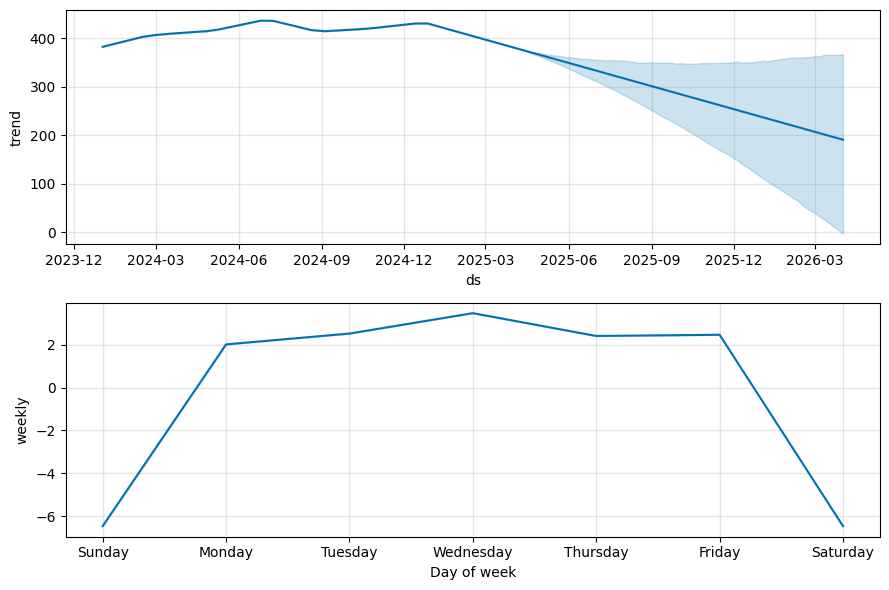

In [30]:
from prophet import Prophet

# Crear el modelo y ajustarlo
modelo = Prophet()
modelo.fit(df['MSFT_Close'].reset_index().rename(columns={'date': 'ds', 'MSFT_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df['MSFT_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Predicción con Prophet')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
fig = modelo.plot_components(predicciones)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5iblhc30/kzueoz69.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5iblhc30/_e5c0jpw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24758', 'data', 'file=/tmp/tmp5iblhc30/kzueoz69.json', 'init=/tmp/tmp5iblhc30/_e5c0jpw.json', 'output', 'file=/tmp/tmp5iblhc30/prophet_modelfme8hlgl/prophet_model-20250513004242.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:42:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:42:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


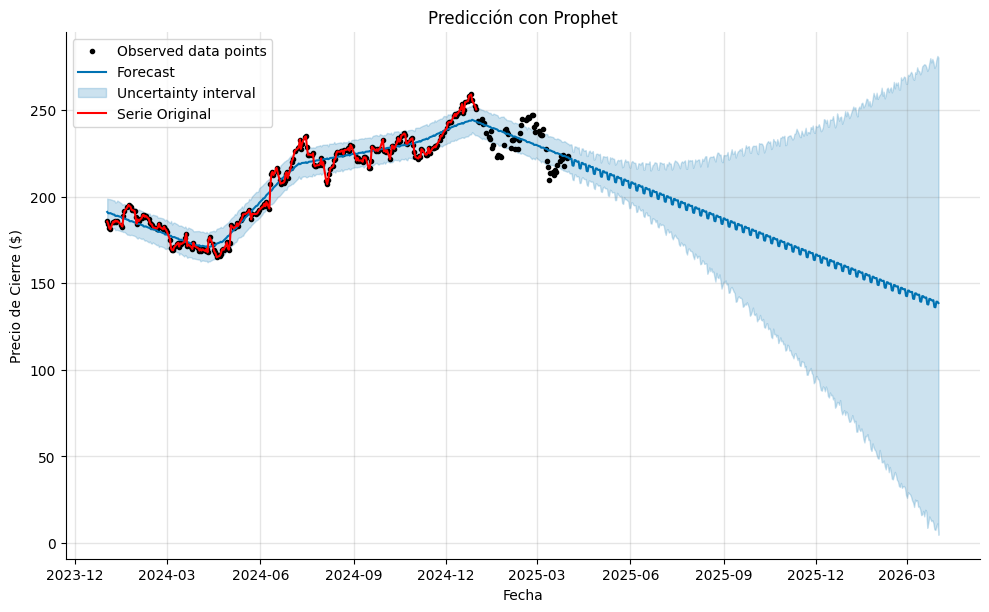

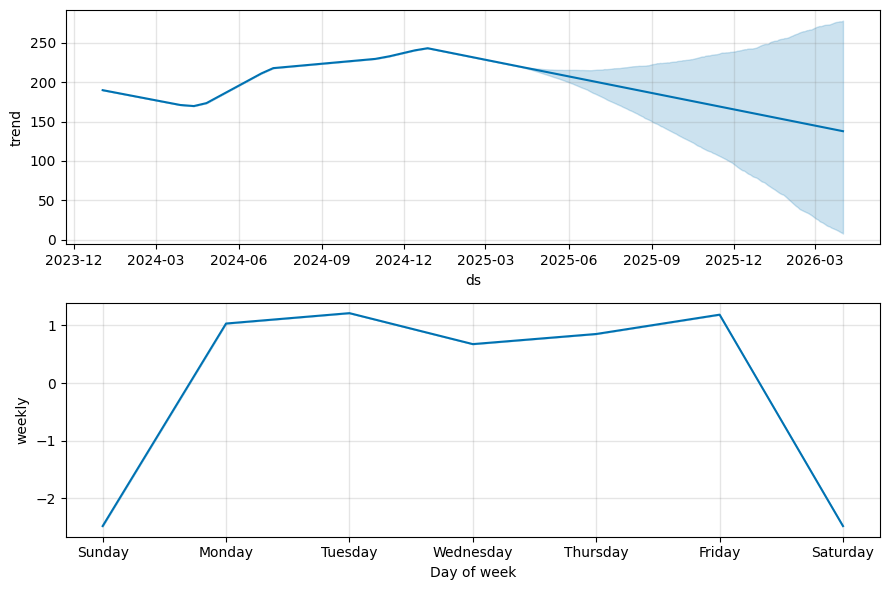

In [31]:
from prophet import Prophet

# Crear el modelo y ajustarlo
modelo = Prophet()
modelo.fit(df['AAPL_Close'].reset_index().rename(columns={'date': 'ds', 'AAPL_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df2['AAPL_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Predicción con Prophet')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
fig = modelo.plot_components(predicciones)



# RESULTADOS

Los hallazgos del análisis fueron los siguientes:

Estacionariedad:
Las pruebas ADF confirmaron que los precios de cierre de ambas acciones no son estacionarios en su forma original. No obstante, al modelar la tendencia con funciones polinómicas, los residuales del caso de Microsoft sí mostraron signos de estacionariedad, lo cual valida el modelo. En el caso de Apple, la serie fue más compleja y los residuales aún contenían componentes no estacionarios.

Relación causal:
La prueba de Granger se aplicó considerando hasta cinco rezagos. Los valores p obtenidos fueron mayores a 0.05 en todos los casos, lo que indica que no existe evidencia estadísticamente significativa para afirmar que una acción predice el comportamiento de la otra. Es decir, ambas evolucionan de forma independiente desde este punto de vista.

Predicción:
Los modelos Prophet generaron pronósticos visualmente coherentes con las tendencias anteriores. Aunque no se midió con precisión el error de predicción, las curvas resultantes muestran comportamientos consistentes, lo que valida el uso de Prophet como herramienta práctica para este tipo de datos.

#CONCLUSION

A lo largo del análisis se confirmó que los precios de las acciones de Microsoft y Apple no son estacionarios, lo cual es habitual en series financieras reales. Sin embargo, mediante transformaciones y ajustes polinomiales, fue posible modelar de manera eficaz las tendencias subyacentes, al menos en el caso de Microsoft. Esto es un paso importante para aplicar modelos de predicción con mayor solidez.

La prueba de causalidad de Granger no arrojó una relación predictiva entre ambas compañías, lo cual sugiere que, aunque se muevan en mercados similares, sus dinámicas no están fuertemente ligadas a corto plazo.

Por su parte, el modelo Prophet demostró ser útil para proyectar la evolución de los precios de cierre, permitiendo obtener estimaciones visualmente claras y adaptadas a las condiciones históricas.

En resumen, este trabajo combina herramientas estadísticas, visuales y predictivas para comprender el comportamiento bursátil desde una perspectiva práctica. En futuras investigaciones, sería interesante incluir otras empresas del sector, ampliar el rango temporal y comparar modelos más sofisticados, como redes neuronales o técnicas de aprendizaje automático, para seguir afinando la precisión de las predicciones.